### __1. Generate feature__

Features generation from chemical structures is a critical step in developing QSAR models and the models are used to predict the biological activity/properties of molecules based on their chemical structure. 

Chemical structures is a complex, and direct use of these structures in machine learning models is impractical. Feature generation transforms these structures into numerical descriptors that can capture various aspects of the molecules, such as: Physicochemical Properties: Hydrophobicity, electronic distribution, hydrogen bond donors/acceptors, etc. Topological Descriptors: Molecular connectivity, shape indices, etc. Geometric Descriptors: 3D spatial arrangement of atoms.

I explored the fingerprint (FP) based descriptor, including maccs, avalon, ecfp, fcfp, topological, atompair, rdkit, pattern, layered, secfp, erg, estate, avalon-count, rdkit-count, ecfp-count, fcfp-count, topological-count, atompair-count, and CATS, RDKitDescriptors2D, MordredDescriptors, etc available in molfeat from datamol.

I found that the Atom pair FP feature works better compared to other features as demonstrated below. Atompair is a FP based descriptors that quantify the spatial and topological relationships between pairs of atoms within a molecule. This feature helps in capturing the structural characteristics of a molecule. 

For generating features, as shown below, I used molfeat from datamol (https://github.com/datamol-io/molfeat) which is a library that facilitates feature extraction from molecular structures for machine learning applications in computational chemistry.


In [41]:
# Importing the necessary libraries
import pandas as pd
import datamol as dm
from molfeat.calc import FPCalculator
from molfeat.trans import MoleculeTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor

In [42]:
# Reading the data
file = pd.read_csv('../data/chembl_dataset/03_pfDHODH_bioactivity_data_3category_norm_pIC50.csv')
df = pd.DataFrame(file, columns=['molecule_chembl_id','canonical_smiles', 'pIC50'])
df

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,4.370590
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,3.845880
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,4.029653
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,3.813892
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,3.698970
...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,3.602060
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,3.602060
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,3.602060
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,8.000000


In [43]:
# Calculating the molecular descriptors using MolFeat   
from molfeat.calc import FP_FUNCS # import FP_FUNCS fuction from molfeat.calc module
FP_FUNCS.keys() # check the available FP functions

dict_keys(['maccs', 'avalon', 'ecfp', 'fcfp', 'topological', 'atompair', 'rdkit', 'pattern', 'layered', 'map4', 'secfp', 'erg', 'estate', 'avalon-count', 'rdkit-count', 'ecfp-count', 'fcfp-count', 'topological-count', 'atompair-count'])

In [44]:
# Create a FPCalculator object and calculate the atompair molecular descriptors
calc = FPCalculator("atompair") 

In [45]:
# create a MoleculeTransformer object
trans = MoleculeTransformer(calc) 
print(trans) # print the object

MoleculeTransformer(featurizer=<molfeat.calc.fingerprints.FPCalculator object at 0x14c573740>)


In [46]:
# Calculate the ECFP fingerprints for canonical_smiles in df
with dm.without_rdkit_log(): # suppress the RDKit warnings
    df['fp'] = trans.transform(df.canonical_smiles.values) 
df

,molecule_chembl_id,canonical_smiles,pIC50,fp
0,CHEMBL199572,CN(C(=O)c1ccc(-c2ccccc2)cc1)c1ccccc1C(=O)O,4.370590,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,CHEMBL199574,O=C(Nc1ccccc1C(=O)O)c1ccc2cc(Br)ccc2c1,3.845880,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL372561,CN(C(=O)c1ccc2cc(Br)ccc2c1)c1ccccc1C(=O)O,4.029653,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL370865,O=C(Nc1ccccc1C(=O)O)c1ccc(-c2ccccc2)cc1,3.813892,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL199575,CN(C(=O)c1ccc2ccccc2c1)c1ccccc1C(=O)O,3.698970,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
597,CHEMBL4569109,Cn1nc(OCC2CC2)c(C(=O)O)c1COc1ccccc1,3.602060,"[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
598,CHEMBL4568957,Cn1nc(OCc2ccccc2)c(C(=O)O)c1COc1ccccc1,3.602060,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
599,CHEMBL4449622,Cn1nc(O)c(C(N)=O)c1COc1ccccc1,3.602060,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
600,CHEMBL1956285,Cc1cc(Nc2ccc(S(F)(F)(F)(F)F)cc2)n2nc(C(C)(F)F)...,8.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [47]:
# Save the date to a csv file
df.to_csv('../data/feature_atompair/04_pfDHODH_atom-pair_FP.csv')

#### __2. Build QSAR Model__

QSAR model is a computational model used in chemistry and drug design. They predict the activity and properties of chemical compounds based on their molecular structure.

The "feature" in QSAR refers to the different properties or descriptors of the molecules, such as size, shape, charge, and other chemical features. The "activity" refers to the biological activity of the compounds, such as their ability to bind to a specific protein, inhibit a certain enzyme, or their toxicity.

Here I build a QSAR model to predict the activity of different compounds against the PfDHODH enzyme and the model can be used to identify new drugs for malaria, as PfDHODH is a target for antimalarial drugs.

##### __2.1. Split the Data into Traning and Test set__

I split 602 PfDHODH compounds into a training set and a testing set with the standard 80/20 ratio. The model will be trained on the training set and then its performance will be evaluated on the testing set.

For this, I use the train_test_split function from the sklearn.model_selection module to split a dataset into random train and test subsets.

In [48]:
from sklearn.model_selection import train_test_split
import numpy as np

# In DataFrame,  the feature is fp column and and the target is pIC50 column 
features = np.stack(df['fp'].values) 
target = df['pIC50']

# Split the data into training and testing sets with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=75)

# Write training set to CSV
np.savetxt('../data/train_test_dataset/X_train.csv', X_train, delimiter=',')
np.savetxt('../data/train_test_dataset/y_train.csv', y_train, delimiter=',')

# Write testing set to CSV
np.savetxt('../data/train_test_dataset/X_test.csv', X_test, delimiter=',')
np.savetxt('../data/train_test_dataset/y_test.csv', y_test, delimiter=',')

# inspect the data and their types
print("X_train, feature:\n", X_train, type(X_train))
print("X_test, feature:\n", X_test, type(X_test))
print("y_train, target:\n", y_train, type(y_train))
print("y_test,target:\n", y_test, type(y_test))

X_train, feature:
 [[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]] <class 'numpy.ndarray'>
X_test, feature:
 [[0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]] <class 'numpy.ndarray'>
y_train, target:
 579    4.853872
298    4.000000
542    6.338187
404    4.841638
560    7.236572
         ...   
136    5.065502
465    5.000000
19     4.000000
368    4.403953
248    5.600326
Name: pIC50, Length: 481, dtype: float64 <class 'pandas.core.series.Series'>
y_test,target:
 75     5.000000
559    4.522879
243    6.154902
382    7.036212
454    5.000000
         ...   
482    4.522879
551    6.917215
327    3.150000
417    7.337242
139    4.236572
Name: pIC50, Length: 121, dtype: float64 <class 'pandas.core.series.Series'>


#### __2.2. Build Model__

I consider frequently used a bunch of eight machine learning algorithms for bulding QSAR models for the PfDHODH: Linear Regression, Support Vector Regression (SVR), Random Forest Regressor, Gradient Boosting Regressor,  HistGradient Boosting Regressor, XGBoost Regressor, LightGBM Regressor and CatBoost Regressor.

../data/model_data/hgbr_model training score: 0.973
../data/model_data/hgbr_model test score: 0.756



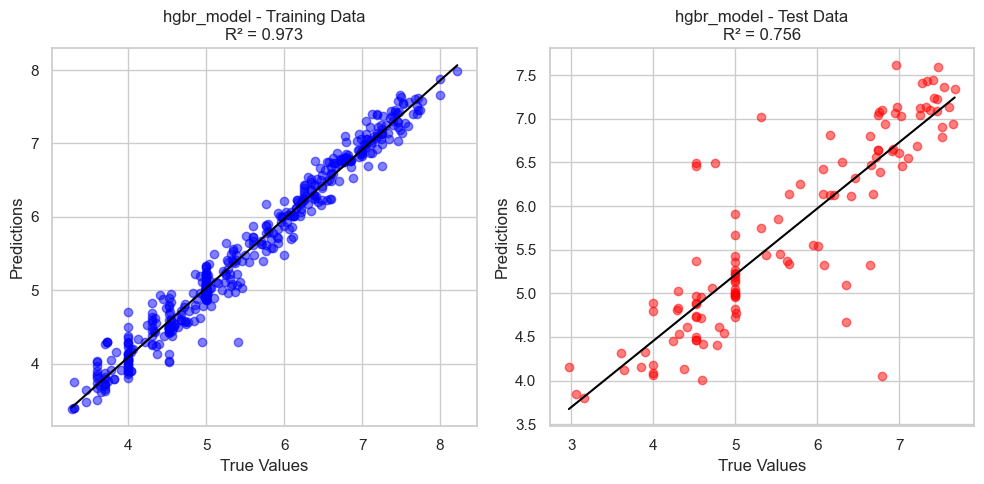

../data/model_data/svr_model training score: 0.871
../data/model_data/svr_model test score: 0.743



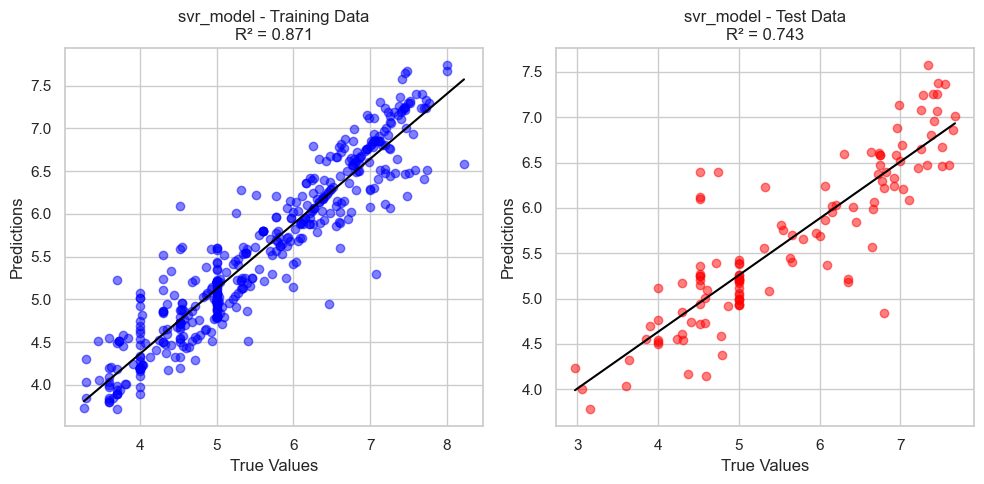

../data/model_data/lr_model training score: 0.994
../data/model_data/lr_model test score: -344191452133354220027904.000



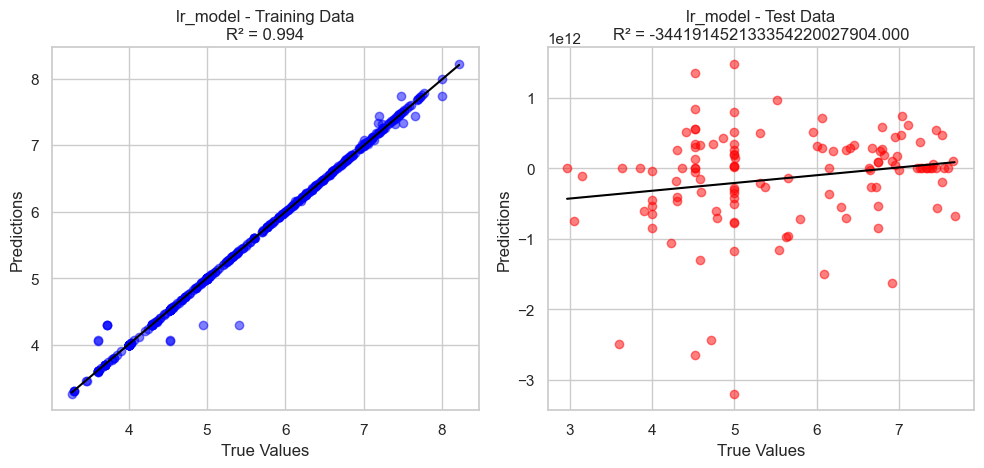

../data/model_data/gbr_model training score: 0.892
../data/model_data/gbr_model test score: 0.708



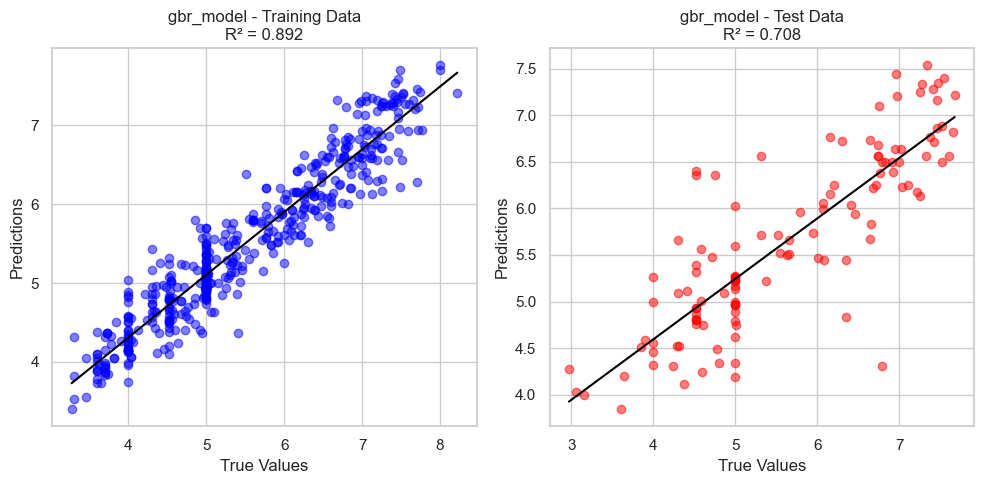

../data/model_data/xgb_model training score: 0.994
../data/model_data/xgb_model test score: 0.771



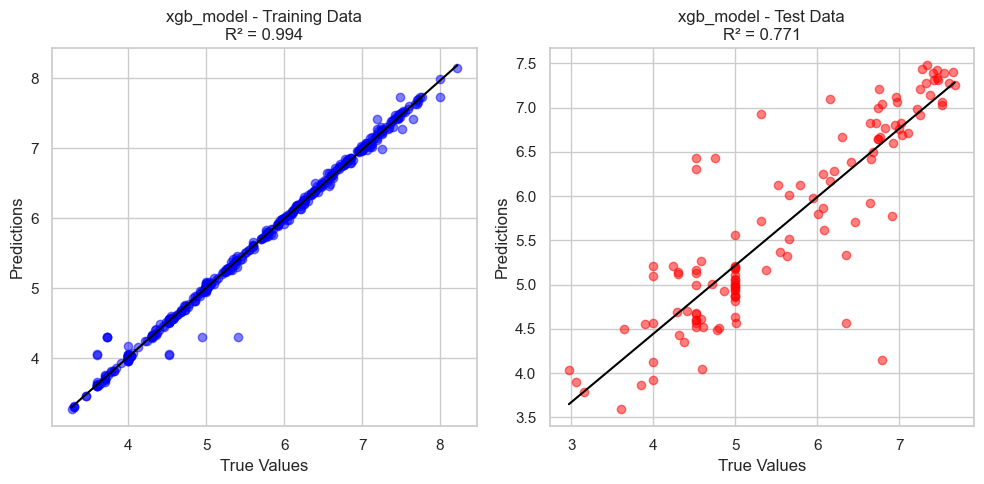

../data/model_data/lgbm_model training score: 0.991
../data/model_data/lgbm_model test score: 0.771



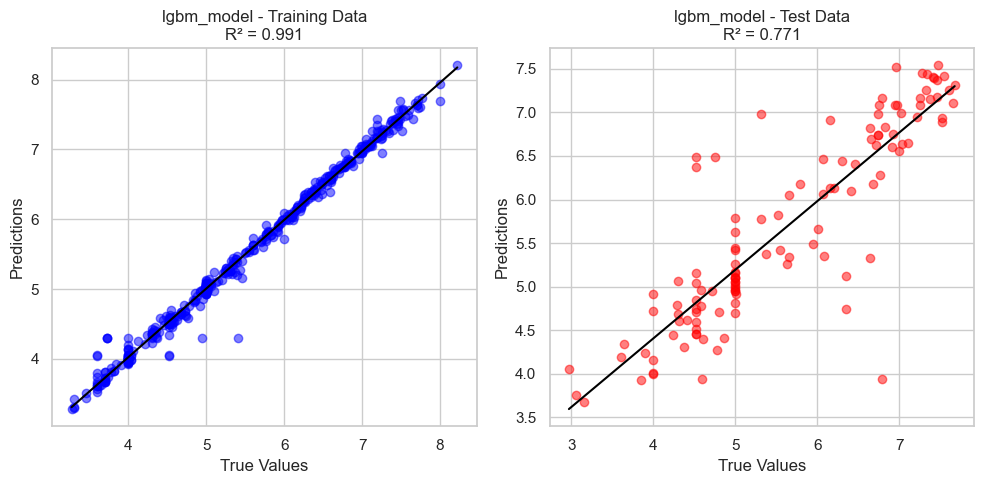

../data/model_data/cat_model training score: 0.968
../data/model_data/cat_model test score: 0.784



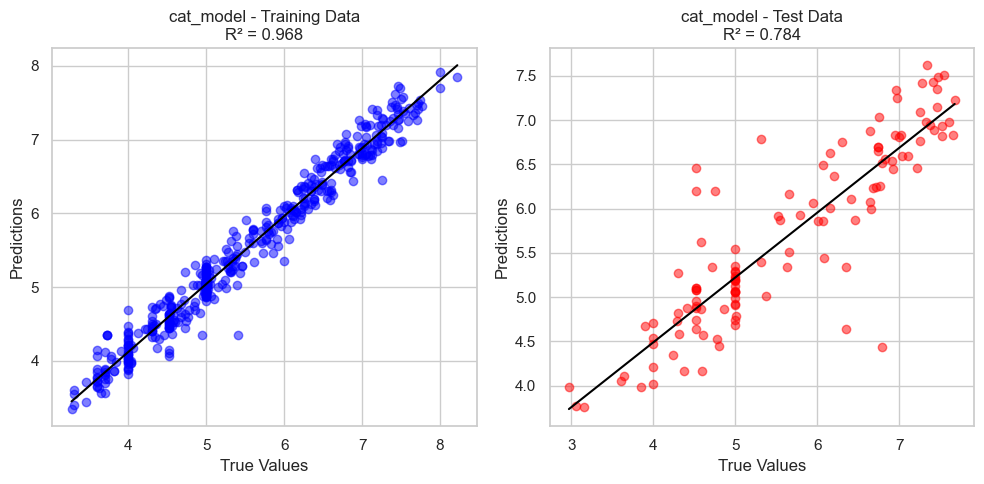

../data/model_data/rf_model training score: 0.958
../data/model_data/rf_model test score: 0.755



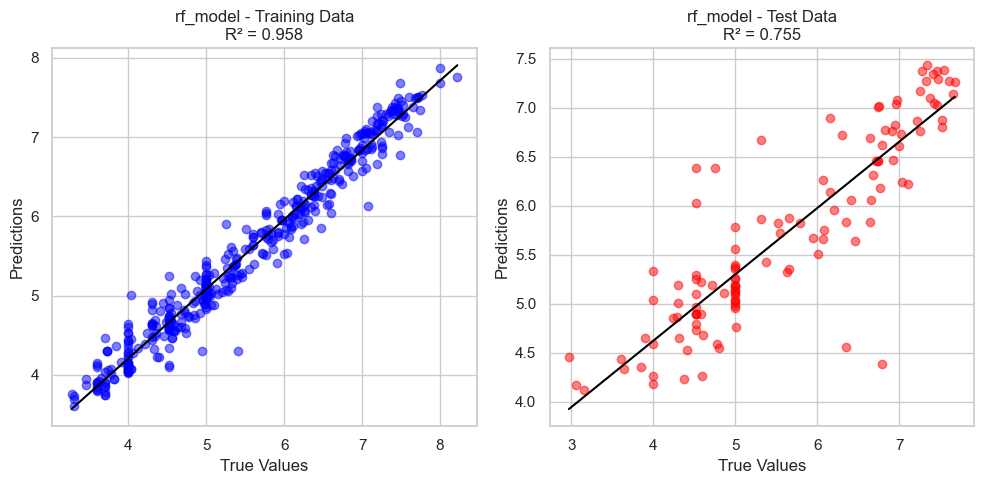

In [49]:
# Importing the necessary libraries
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import joblib

# Initialize the models with some commonly used parameters
models = {
    "hgbr_model": HistGradientBoostingRegressor(random_state=42),
    "svr_model": SVR(kernel='rbf', C=1.0, epsilon=0.2),
    "lr_model": LinearRegression(),
    "gbr_model": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "xgb_model": XGBRegressor(n_estimators=250, learning_rate=0.1, random_state=42),
    "lgbm_model": LGBMRegressor(n_estimators=250, learning_rate=0.1, random_state=42, verbose=-1),
    "cat_model": CatBoostRegressor(n_estimators=250, learning_rate=0.1, random_state=42, verbose=0),
    "rf_model": RandomForestRegressor(n_estimators=250, random_state=42) 
}

# Train each model, print its R^2 score, and plot its predictions
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Calculate and print R^2 scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f'../data/model_data/{model_name} training score: {train_score:.3f}')
    print(f'../data/model_data/{model_name} test score: {test_score:.3f}\n')
    
    # Make predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Save the model
    joblib.dump(model, f'../data/model_data/{model_name}.joblib')

     # Write actual and predicted values to a CSV file
    train_df = pd.DataFrame({'Actual': y_train, 'Predicted': train_preds})
    test_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_preds})
    
    train_df.to_csv(f'../data/model_data/{model_name}_train_predictions.csv', index=False)
    test_df.to_csv(f'../data/model_data/{model_name}_test_predictions.csv', index=False)
    
    # Create scatter plots
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, train_preds, color='blue', alpha=0.5)
    plt.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, train_preds, 1))(np.unique(y_train)), color='black')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - Training Data\nR² = {r2_score(y_train, train_preds):.3f}')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, test_preds, color='red', alpha=0.5)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, test_preds, 1))(np.unique(y_test)), color='black')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - Test Data\nR² = {r2_score(y_test, test_preds):.3f}')
    
    plt.tight_layout()
    plt.show()

### __3. Validate Models__
Model validation is a crucial step in the machine learning pipeline. It helps to ensure that our model has learned to generalize from the training data and can make accurate predictions on unseen data.

#### __3.1 10-fold Cross Validation__
The dataset is divided into 'k' subsets. The model is trained on 'k-1' subsets and tested on the remaining subset. This process is repeated 'k' times, with each subset used as the test set once. The model's performance is the average of the performances on each of the 'k' iterations. Here I do 10-fold cross validation on the traning data set.

In [50]:
from sklearn.model_selection import cross_val_score

# Initialize a DataFrame to store the cross-validation scores
ten_cv_scores = pd.DataFrame(columns=['Model', 'CV Scores', 'Average CV Score'])

# Perform 10-fold cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10)
    print(f'{model_name} cross-validation scores: {scores}')
    avg_score = scores.mean()
    print(f'{model_name} average cross-validation score: {avg_score:.3f}\n')
    
    # Append the cross-validation scores to the DataFrame
    new_row = pd.DataFrame({'Model': [model_name], 'CV Scores': [scores.tolist()], 'Average CV Score': [round(avg_score, 3)]})
    if ten_cv_scores.empty:
        ten_cv_scores = new_row
    else:
        ten_cv_scores = pd.concat([ten_cv_scores, new_row], ignore_index=True)

# Print the cross-validation scores table
print(ten_cv_scores)

# Save the cross-validation scores table to a CSV file
ten_cv_scores.to_csv('../data/validation_data/ten_cv_scores.csv', index=False)

hgbr_model cross-validation scores: [0.86565483 0.6003038  0.63779909 0.69021763 0.61630205 0.69347478
 0.73709105 0.67521802 0.78787023 0.65230486]
hgbr_model average cross-validation score: 0.696

svr_model cross-validation scores: [0.78456475 0.61188646 0.60456846 0.638729   0.62807426 0.63185932
 0.79512805 0.67220801 0.69799124 0.66847391]
svr_model average cross-validation score: 0.673

lr_model cross-validation scores: [-2.95023414e+22 -4.19760834e+24 -1.05975762e+21 -9.58575176e+22
 -1.50724932e+22 -2.88520985e+24 -2.22248291e+24 -6.65090981e+23
 -1.10526564e+24 -2.73831522e+23]
lr_model average cross-validation score: -1149098135141299775340544.000

gbr_model cross-validation scores: [0.80777763 0.52630762 0.51036993 0.64229258 0.51239717 0.60475855
 0.78458531 0.68943422 0.76163151 0.64673535]
gbr_model average cross-validation score: 0.649

xgb_model cross-validation scores: [0.82961934 0.65252142 0.53663583 0.72643122 0.60261907 0.6797378
 0.77400394 0.72246957 0.86070559 0

##### __3.1 5-fold Cross Validation__

In [51]:
from sklearn.model_selection import cross_val_score

# Initialize a DataFrame to store the cross-validation scores
five_cv_scores = pd.DataFrame(columns=['Model', 'CV Scores', 'Average CV Score'])

# Perform 5-fold cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'{model_name} cross-validation scores: {scores}')
    avg_score = scores.mean()
    print(f'{model_name} average cross-validation score: {avg_score:.3f}\n')
    
    # Append the cross-validation scores to the DataFrame
    new_row = pd.DataFrame({'Model': [model_name], 'CV Scores': [scores.tolist()], 'Average CV Score': [avg_score]})
    if five_cv_scores.empty:
        five_cv_scores = new_row
    else:
        five_cv_scores = pd.concat([five_cv_scores, new_row], ignore_index=True)

# Print the cross-validation scores table
print(five_cv_scores)

# Save the cross-validation scores table to a CSV file
five_cv_scores.to_csv('../data/validation_data/five_cv_scores.csv', index=False)

hgbr_model cross-validation scores: [0.77035857 0.63831356 0.60972194 0.73401514 0.70856487]
hgbr_model average cross-validation score: 0.692

svr_model cross-validation scores: [0.67651662 0.61629438 0.59550141 0.72297787 0.66260033]
svr_model average cross-validation score: 0.655

lr_model cross-validation scores: [-2.81245048e+24 -5.70265211e+24 -1.45789013e+24 -1.47598621e+24
 -9.01233288e+21]
lr_model average cross-validation score: -2291598252272241990434816.000

gbr_model cross-validation scores: [0.68514842 0.57873127 0.55587192 0.74220405 0.68868812]
gbr_model average cross-validation score: 0.650

xgb_model cross-validation scores: [0.73758381 0.57947105 0.63054306 0.7518361  0.73653738]
xgb_model average cross-validation score: 0.687

lgbm_model cross-validation scores: [0.77816199 0.63815652 0.62918059 0.73426905 0.70928917]
lgbm_model average cross-validation score: 0.698

cat_model cross-validation scores: [0.7325055  0.64829307 0.64486712 0.79374318 0.70590512]
cat_model

#### __3.2 Mean square error (MSE) and Mean absolute error (MSE)__

Mean Square Error (MSE) and Mean Absolute Error (MAE) are two commonly used metrics for regression model evaluation. They both measure the average error of the model predictions.

__Mean Square Error (MSE):__ It is the average of the squared differences between the predicted and actual values. It gives more weight to larger errors because they are squared before they are averaged, which can be useful if large errors are particularly undesirable. The formula for MSE is:

MSE = (1/n) * Σ(actual - prediction)²

where n is the number of observations, actual is the actual value, and prediction is the predicted value.

__Mean Absolute Error (MAE):__ It is the average of the absolute differences between the predicted and actual values. It gives equal weight to all errors, which can be useful if you're concerned about all errors equally, regardless of their size. The formula for MAE is:
MAE = (1/n) * Σ|actual - prediction|

where n is the number of observations, actual is the actual value, and prediction is the predicted value.

Here, I caiculate MSE and MAE on the traning and test sets to understand the models quality.

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize a DataFrame to store the MSE and MAE
error_scores = pd.DataFrame(columns=['Model', 'Train MSE', 'Test MSE', 'Train MAE', 'Test MAE'])

# Train each model and calculate MSE and MAE
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Make predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    # Calculate and print MSE and MAE
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    
    print(f'{model_name} training MSE: {train_mse:.3f}, MAE: {train_mae:.3f}')
    print(f'{model_name} test MSE: {test_mse:.3f}, MAE: {test_mae:.3f}\n')

    # Append the MSE and MAE to the DataFrame
    new_row = pd.DataFrame({'Model': [model_name], 'Train MSE': [train_mse], 'Test MSE': [test_mse], 'Train MAE': [train_mae], 'Test MAE': [test_mae]})
    if error_scores.empty:
        error_scores = new_row
    else:
        error_scores = pd.concat([error_scores, new_row], ignore_index=True)
# Print the error scores table
print(error_scores)

# Save the error scores table to a CSV file
error_scores.to_csv('../data/validation_data/error_scores.csv', index=False)

hgbr_model training MSE: 0.038, MAE: 0.143
hgbr_model test MSE: 0.372, MAE: 0.415

svr_model training MSE: 0.180, MAE: 0.316
svr_model test MSE: 0.393, MAE: 0.484

lr_model training MSE: 0.008, MAE: 0.018
lr_model test MSE: 525991669371079722270720.000, MAE: 474823628062.708

gbr_model training MSE: 0.151, MAE: 0.304
gbr_model test MSE: 0.446, MAE: 0.505

xgb_model training MSE: 0.009, MAE: 0.036
xgb_model test MSE: 0.350, MAE: 0.380

lgbm_model training MSE: 0.012, MAE: 0.059
lgbm_model test MSE: 0.350, MAE: 0.379

cat_model training MSE: 0.045, MAE: 0.163
cat_model test MSE: 0.330, MAE: 0.421

rf_model training MSE: 0.059, MAE: 0.177
rf_model test MSE: 0.375, MAE: 0.448

        Model  Train MSE      Test MSE  Train MAE      Test MAE
0  hgbr_model   0.038359  3.724376e-01   0.142915  4.150424e-01
1   svr_model   0.180466  3.933398e-01   0.316221  4.842832e-01
2    lr_model   0.007959  5.259917e+23   0.017804  4.748236e+11
3   gbr_model   0.151399  4.458140e-01   0.304226  5.048632e-0

### __3.3. Improve R2 Score on Test Set by removing outliers__

The analysis of the scatter plot above for the test set shows some outliers in the lower section. Removing those two data points could improve the R2 correlation coefficient. Therefore, I removed those two points and rerun the prediction on the test test and no changes are made to the traning set and. 

As you can see below, the correlation score R2 is improved. 

hgbr_model training score: 0.973
hgbr_model test score: 0.810



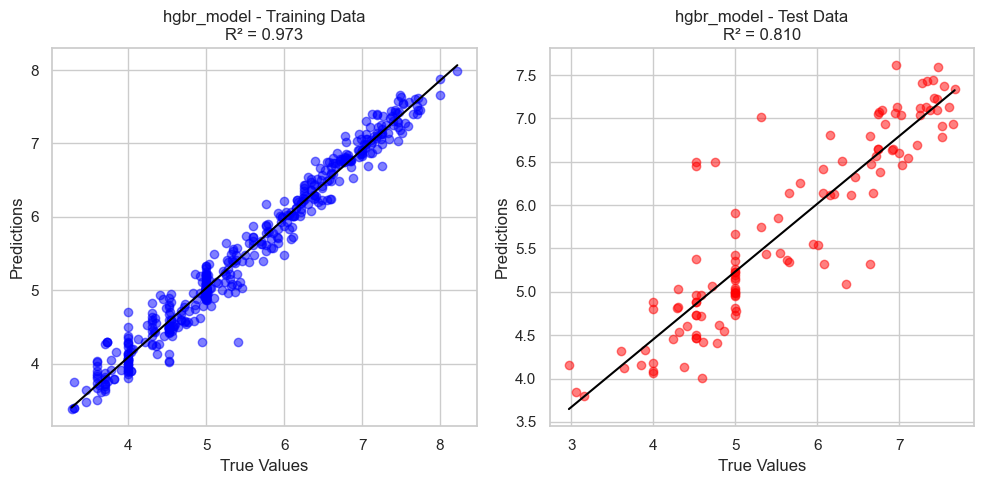

svr_model training score: 0.871
svr_model test score: 0.764



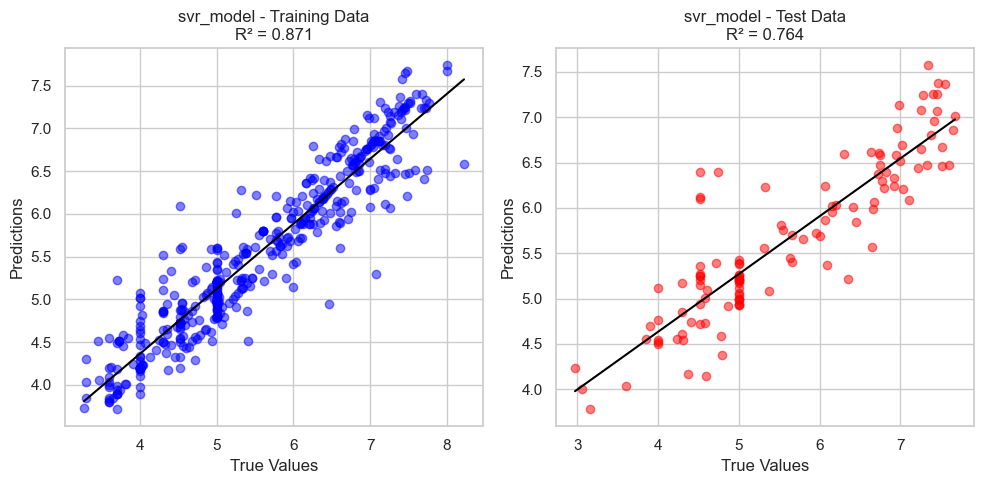

lr_model training score: 0.994
lr_model test score: -366353226235894084665344.000



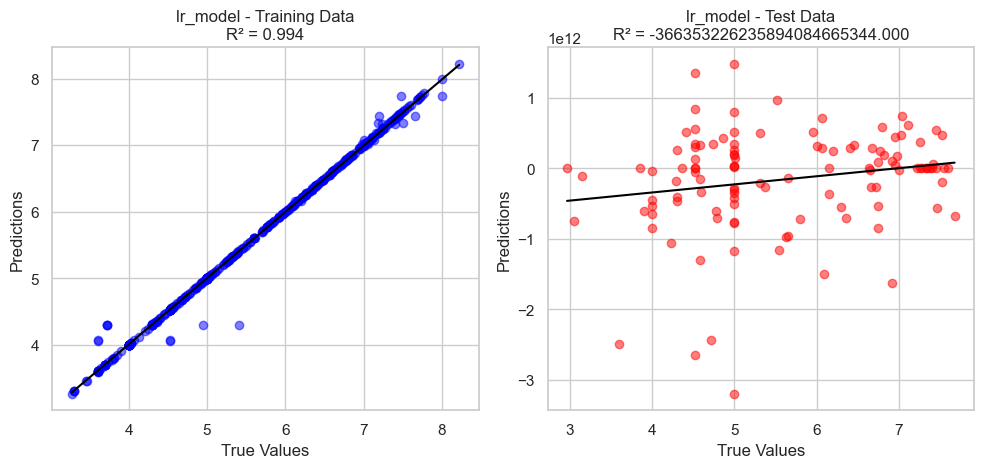

gbr_model training score: 0.892
gbr_model test score: 0.745



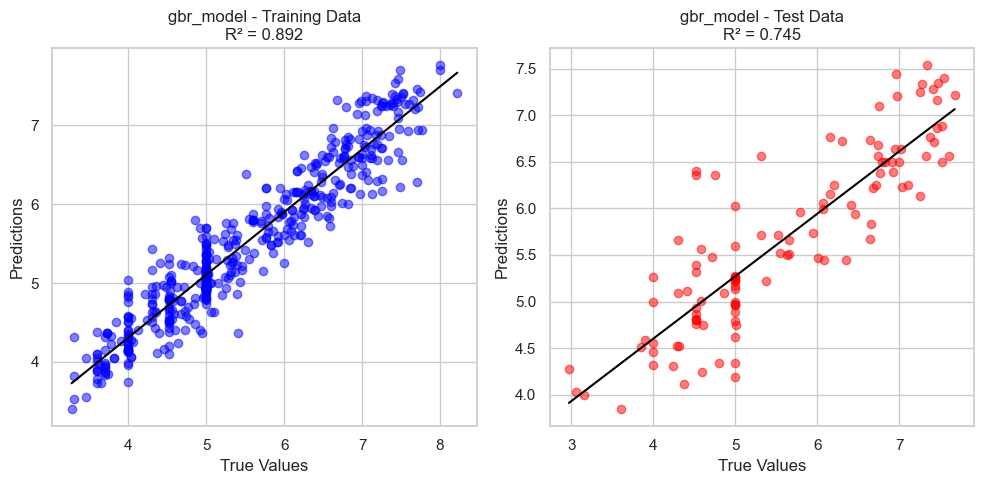

xgb_model training score: 0.994
xgb_model test score: 0.813



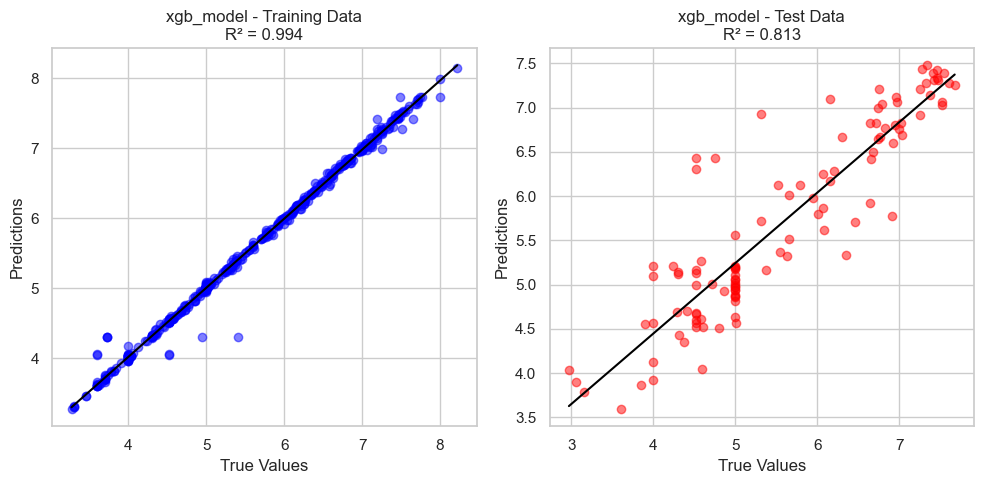

lgbm_model training score: 0.991
lgbm_model test score: 0.818



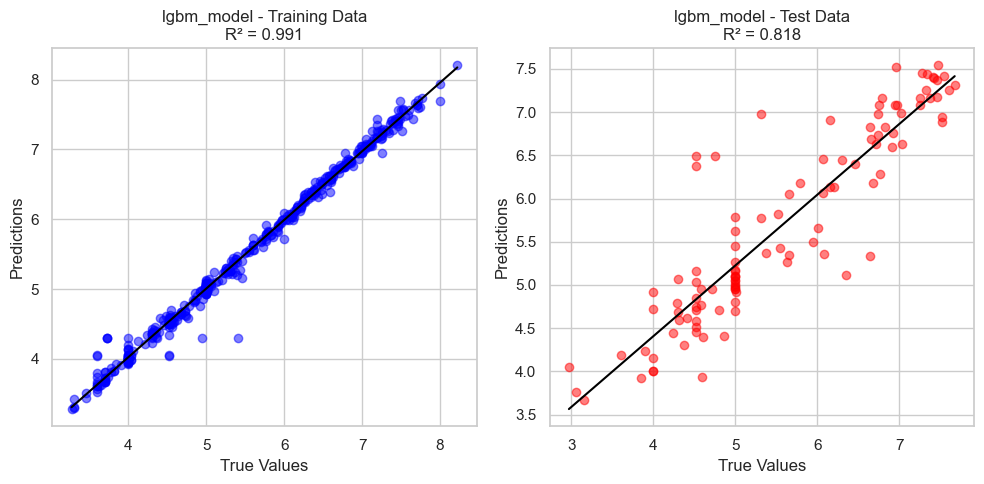

cat_model training score: 0.968
cat_model test score: 0.820



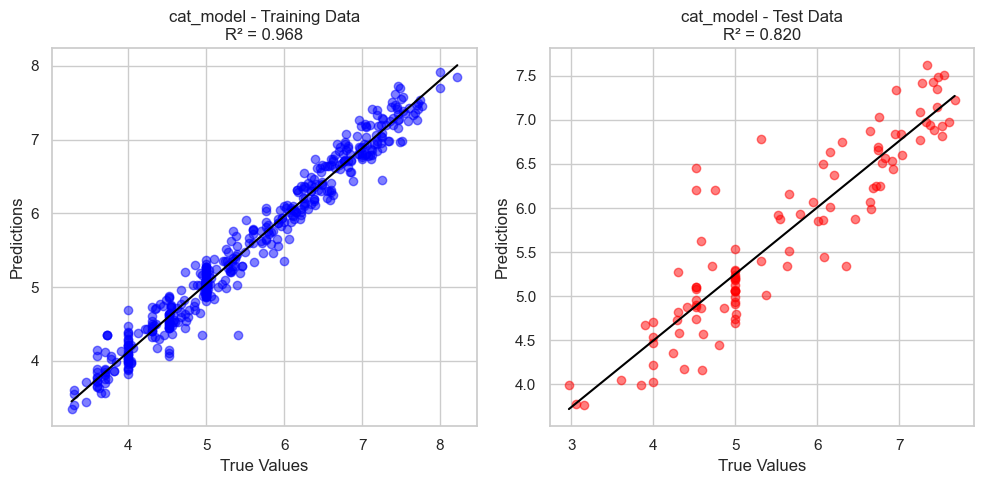

rf_model training score: 0.958
rf_model test score: 0.786



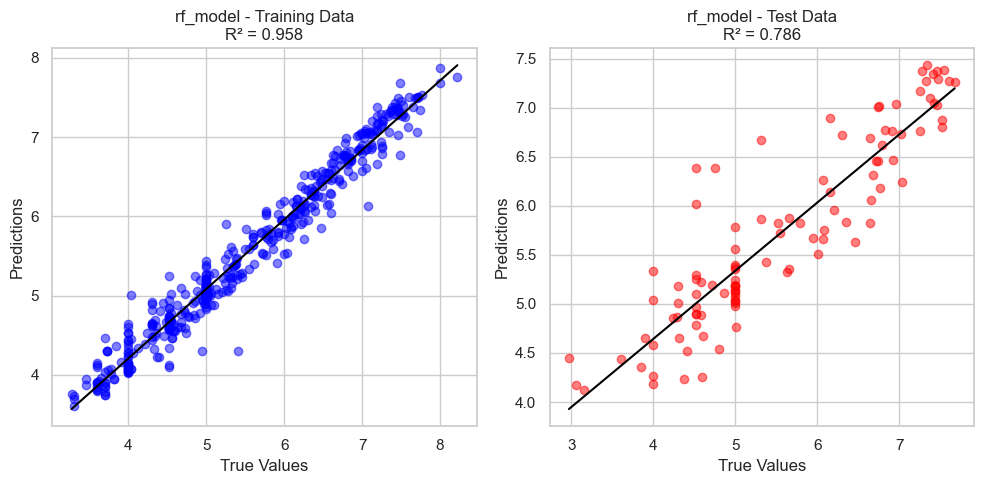

        Model  Train R²       Test R²
0  hgbr_model     0.973  8.100000e-01
1   svr_model     0.871  7.640000e-01
2    lr_model     0.994 -3.663532e+23
3   gbr_model     0.892  7.450000e-01
4   xgb_model     0.994  8.130000e-01
5  lgbm_model     0.991  8.180000e-01
6   cat_model     0.968  8.200000e-01
7    rf_model     0.958  7.860000e-01


In [53]:
from joblib import load
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import numpy as np

# List of model names
model_names = ["hgbr_model", "svr_model", "lr_model", "gbr_model", "xgb_model", "lgbm_model", "cat_model", "rf_model"]

# Assuming the rows to be removed are at indexes 52 and 59 (since numpy uses zero-based indexing)
indexes_to_remove = 52, 59

#Initialize a DataFrame to store the R² scores
r2_scores = pd.DataFrame(columns=['Model', 'Train R²', 'Test R²'])

# Load each model, make predictions on the train and test sets, and save the predictions
for model_name in model_names:
    # Load the model
    model = load(f'../data/model_data/{model_name}.joblib')

    # Make predictions on the training set
    train_preds = model.predict(X_train)
    train_score = model.score(X_train, y_train)
    # Save the training predictions to a CSV file
    #pd.DataFrame(train_preds, columns=['Predicted']).to_csv(f'{model_name}_train_predictions.csv', index=False)

    # Make predictions on the test set
    # Remove the rows from X_test and y_test
    X_test = np.delete(X_test, indexes_to_remove, axis=0)
    y_test = np.delete(y_test, indexes_to_remove, axis=0)
    
    test_preds = model.predict(X_test)
    test_score = model.score(X_test, y_test)
    # Save the test predictions to a CSV file
    #pd.DataFrame(test_preds, columns=['Predicted']).to_csv(f'{model_name}_test_predictions.csv', index=False)

    # Print R^2 scores
    print(f'{model_name} training score: {train_score:.3f}')
    print(f'{model_name} test score: {test_score:.3f}\n')

    # Append the R² scores to the DataFrame
    new_row = pd.DataFrame({'Model': [model_name], 'Train R²': [round(train_score, 3)], 'Test R²': [round(test_score, 3)]})
    if r2_scores.empty:
        r2_scores = new_row
    else:
        r2_scores = pd.concat([r2_scores, new_row], ignore_index=True)

    # Create scatter plots
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, train_preds, color='blue', alpha=0.5)
    plt.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, train_preds, 1))(np.unique(y_train)), color='black')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - Training Data\nR² = {r2_score(y_train, train_preds):.3f}')
    
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, test_preds, color='red', alpha=0.5)
    plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, test_preds, 1))(np.unique(y_test)), color='black')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'{model_name} - Test Data\nR² = {r2_score(y_test, test_preds):.3f}')
    
    plt.tight_layout()
    plt.show()

# Print the R² scores table
print(r2_scores)
r2_scores.to_csv('../data/validation_data/r2_scores_after_outliers.csv', index=False)

### __5. Analysis and selection of models__

Based on the performance metrics, the models can be compared and selected as follows:

__5.1 Training vs. Test Performance:__

The CatBoost model has a high training score (0.968) and the highest test score (0.820), indicating good generalization capabilities. While LightGBM, XGBoost and HGBR have slightly better training scores (0.991, 0.994 and 0.976 respectively), their test scores are marginally lower (0.818, 0.813 and 0.810), suggesting might be potential overfitting.

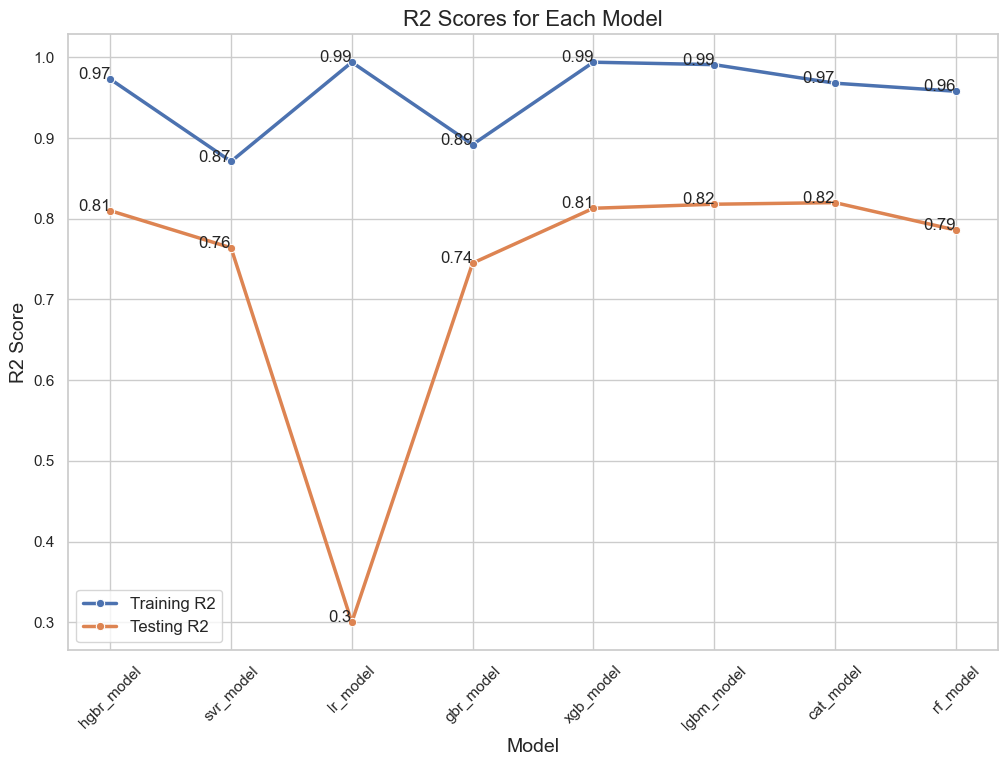

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Read the CSV file
df = pd.read_csv('../data/validation_data/r2_scores_after_outliers.csv')

# Create a larger figure
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot function for the plots
# sns.lineplot(x='Model', y='Train R2', data=df, marker='o', label='Training R2')
# sns.lineplot(x='Model', y='Test R2', data=df, marker='o', label='Testing R2')
sns.lineplot(x='Model', y='Train R²', data=df, marker='o', label='Training R2', linewidth=2.5)  # Corrected column name
sns.lineplot(x='Model', y='Test R²', data=df, marker='o', label='Testing R2', linewidth=2.5)  # Corrected column name

# Set the labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.title('R2 Scores for Each Model', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend and grid
plt.legend(fontsize=12)
plt.grid(True)

# Add the value of each point on the plot
for i in range(df.shape[0]):
    # plt.text(df['Model'][i], df['Train R2'][i], round(df['Train R2'][i], 2), ha = 'right')
    # plt.text(df['Model'][i], df['Test R2'][i], round(df['Test R2'][i], 2), ha = 'right')
    plt.text(df['Model'][i], df['Train R²'][i], round(df['Train R²'][i], 2), ha = 'right')  # Corrected column name
    plt.text(df['Model'][i], df['Test R²'][i], round(df['Test R²'][i], 2), ha = 'right')  # Corrected column name

# Show the plot
plt.show()

##### __5.2 Cross-Validation Scores:__

The CatBoost model has the highest average cross-validation score (0.72), indicating consistent performance across different folds of the training data.
LightGBM, XGBoost and HGBR follow closely with average cross-validation scores of 0.71, 0.71 and 0.69, showing their robustness but slightly less than CatBoost

##### __5-fold cross validation Vs. 10-fold cross validation__

The 10-fold CV shows a little bit better avrage R2 score than 5-fold CV. Howevr, both show a similar trend as shown in plot below. 

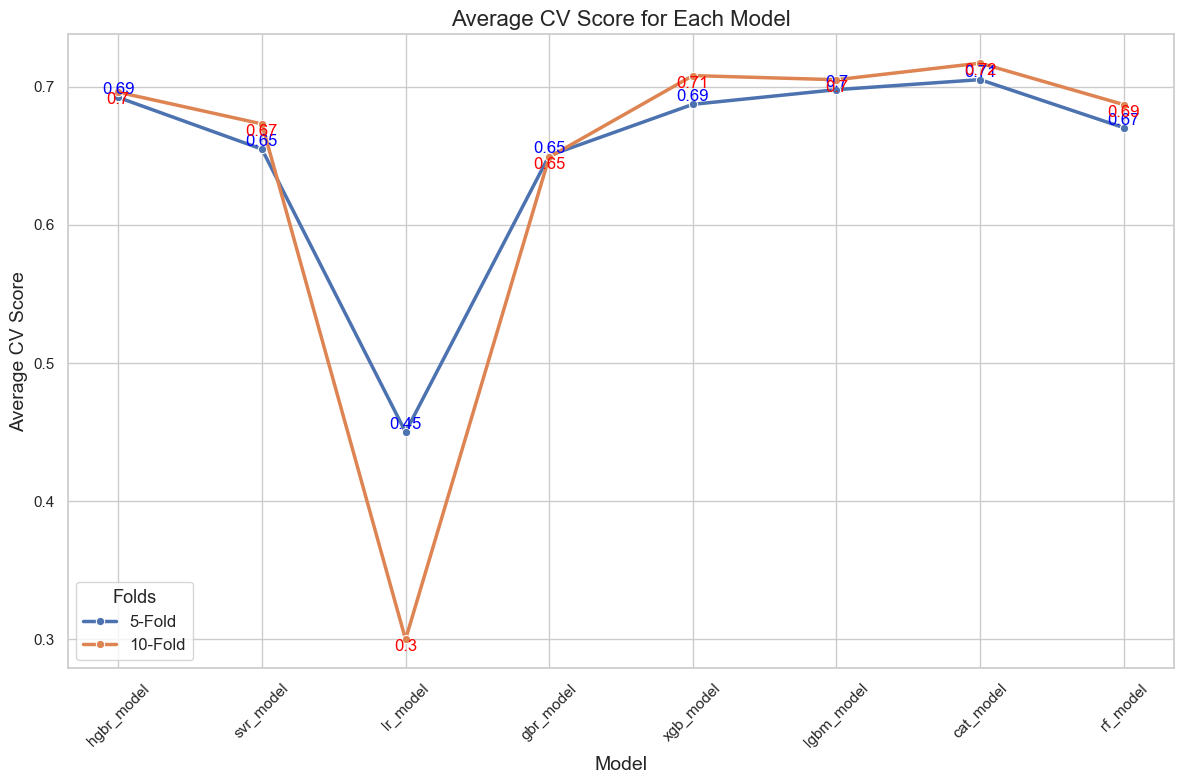

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Read the CSV files
df_five = pd.read_csv('../data/validation_data/five_cv_scores.csv')
df_ten = pd.read_csv('../data/validation_data/ten_cv_scores.csv')

# Add a column to each dataframe to indicate the number of folds
df_five['Folds'] = '5-Fold'
df_ten['Folds'] = '10-Fold'

# Concatenate the dataframes
df = pd.concat([df_five, df_ten])

# Create a larger figure
plt.figure(figsize=(12, 8))

# Use seaborn's lineplot function for the plot with linewidth of 2.5
sns.lineplot(x='Model', y='Average CV Score', hue='Folds', data=df, marker='o', linewidth=2.5)

# Set the labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Average CV Score', fontsize=14)
plt.title('Average CV Score for Each Model', fontsize=16)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the legend and grid
plt.legend(title='Folds', title_fontsize='13', fontsize='12')
plt.grid(True)

# Add the value of each point on the plot
for i in range(df_five.shape[0]):
    plt.text(i, df_five['Average CV Score'][i], round(df_five['Average CV Score'][i], 2), ha = 'center', va='bottom', color='blue')
for i in range(df_ten.shape[0]):
    plt.text(i, df_ten['Average CV Score'][i], round(df_ten['Average CV Score'][i], 2), ha = 'center', va='top', color='red')

# Show the plot
plt.tight_layout()
plt.show()

__5.3 MSE and MAE:__

The CatBoost model has competitive test MSE (0.330) and MAE (0.421) compared to LightGBM and XGBoost, and HGBR. Although LightGBM, XGBoost, and  HGBR have slightly lower test MAE, their cross-validation scores are lower, making CatBoost more reliable overall.

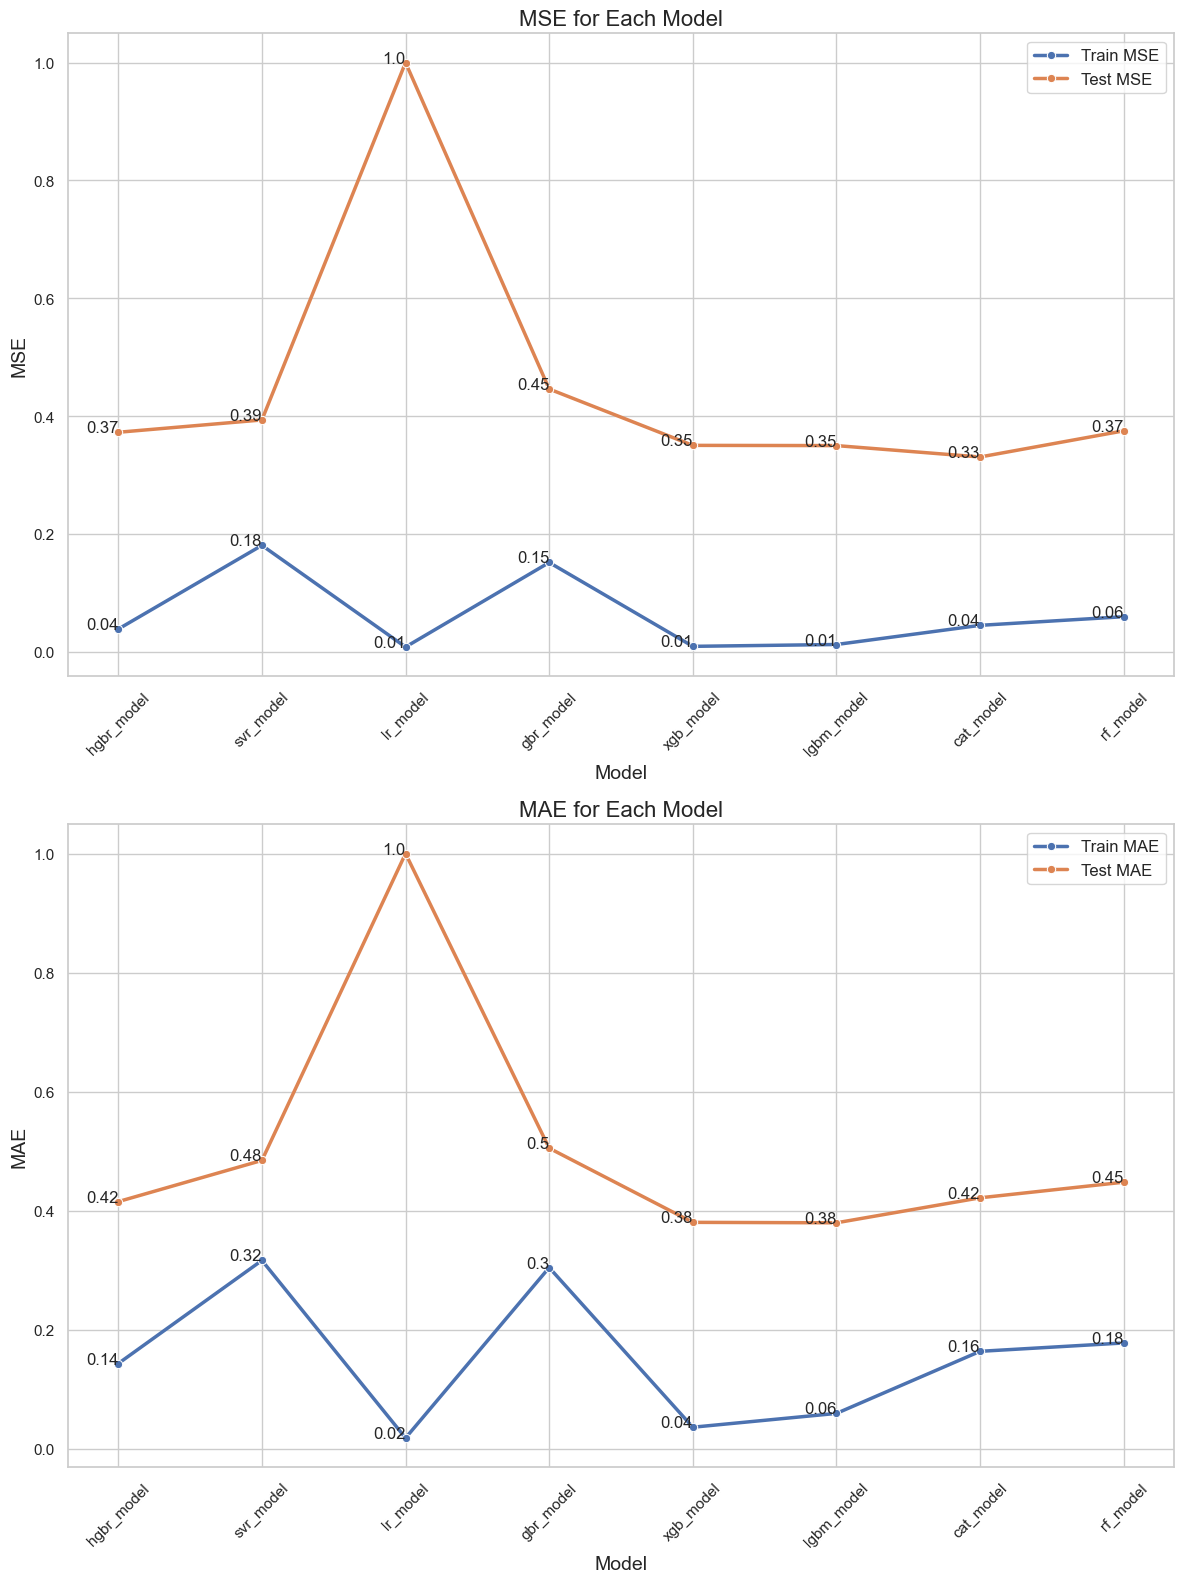

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Read the CSV file
df = pd.read_csv('../data/validation_data/error_scores.csv')

# Create a larger figure
fig, axs = plt.subplots(2, 1, figsize=(12, 16))

# Use seaborn's lineplot function for the plots with linewidth of 2.5
sns.lineplot(x='Model', y='Train MSE', data=df, marker='o', label='Train MSE', ax=axs[0], linewidth=2.5)
sns.lineplot(x='Model', y='Test MSE', data=df, marker='o', label='Test MSE', ax=axs[0], linewidth=2.5)
sns.lineplot(x='Model', y='Train MAE', data=df, marker='o', label='Train MAE', ax=axs[1], linewidth=2.5)
sns.lineplot(x='Model', y='Test MAE', data=df, marker='o', label='Test MAE', ax=axs[1], linewidth=2.5)

# Set the labels and title
axs[0].set_xlabel('Model', fontsize=14)
axs[0].set_ylabel('MSE', fontsize=14)
axs[0].set_title('MSE for Each Model', fontsize=16)
axs[1].set_xlabel('Model', fontsize=14)
axs[1].set_ylabel('MAE', fontsize=14)
axs[1].set_title('MAE for Each Model', fontsize=16)

# Rotate the x-axis labels for better readability
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# Show the legend and grid
axs[0].legend(fontsize=12)
axs[0].grid(True)
axs[1].legend(fontsize=12)
axs[1].grid(True)

# Add the value of each point on the plot
for i in range(df.shape[0]):
    axs[0].text(df['Model'][i], df['Train MSE'][i], round(df['Train MSE'][i], 2), ha = 'right')
    axs[0].text(df['Model'][i], df['Test MSE'][i], round(df['Test MSE'][i], 2), ha = 'right')
    axs[1].text(df['Model'][i], df['Train MAE'][i], round(df['Train MAE'][i], 2), ha = 'right')
    axs[1].text(df['Model'][i], df['Test MAE'][i], round(df['Test MAE'][i], 2), ha = 'right')

# Show the plot
plt.tight_layout()
plt.show()

#### __6. Conclusion:__

The `CatBoost (cat_model)` is the best model to select based on its balanced performance in terms of training/test scores, cross-validation consistency, and error metrics. It is followed by XGB, LGBM, and HGBR. However, CatBoost stands out by demonstrating good generalization with the highest test score and cross-validation average, indicating it is less prone to overfitting and more reliable for our application.